# Import Library

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.applications.efficientnet import preprocess_input
import datetime
import cv2
from google.colab import drive
import kagglehub

# Load dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

Dataset URL: https://www.kaggle.com/datasets/cookiefinder/tomato-disease-multiple-sources
License(s): CC0-1.0
100% 1.37G/1.37G [00:11<00:00, 253MB/s]
100% 1.37G/1.37G [00:11<00:00, 126MB/s]


In [ ]:
with zipfile.ZipFile("tomato-disease-multiple-sources.zip", 'r') as zip_ref:
    zip_ref.extractall("data_tomato")

# Preprocessing

In [ ]:
train_dir = 'data_tomato/train'
valid_dir = 'data_tomato/valid'

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 25851 images belonging to 11 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6684 images belonging to 11 classes.


In [ ]:
print("Jumlah kelas:", train_generator.num_classes)
print("Label Kelas:", train_generator.class_indices)

Jumlah kelas: 11
Label Kelas: {'Bacterial_spot': 0, 'Early_blight': 1, 'Late_blight': 2, 'Leaf_Mold': 3, 'Septoria_leaf_spot': 4, 'Spider_mites Two-spotted_spider_mite': 5, 'Target_Spot': 6, 'Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato_mosaic_virus': 8, 'healthy': 9, 'powdery_mildew': 10}


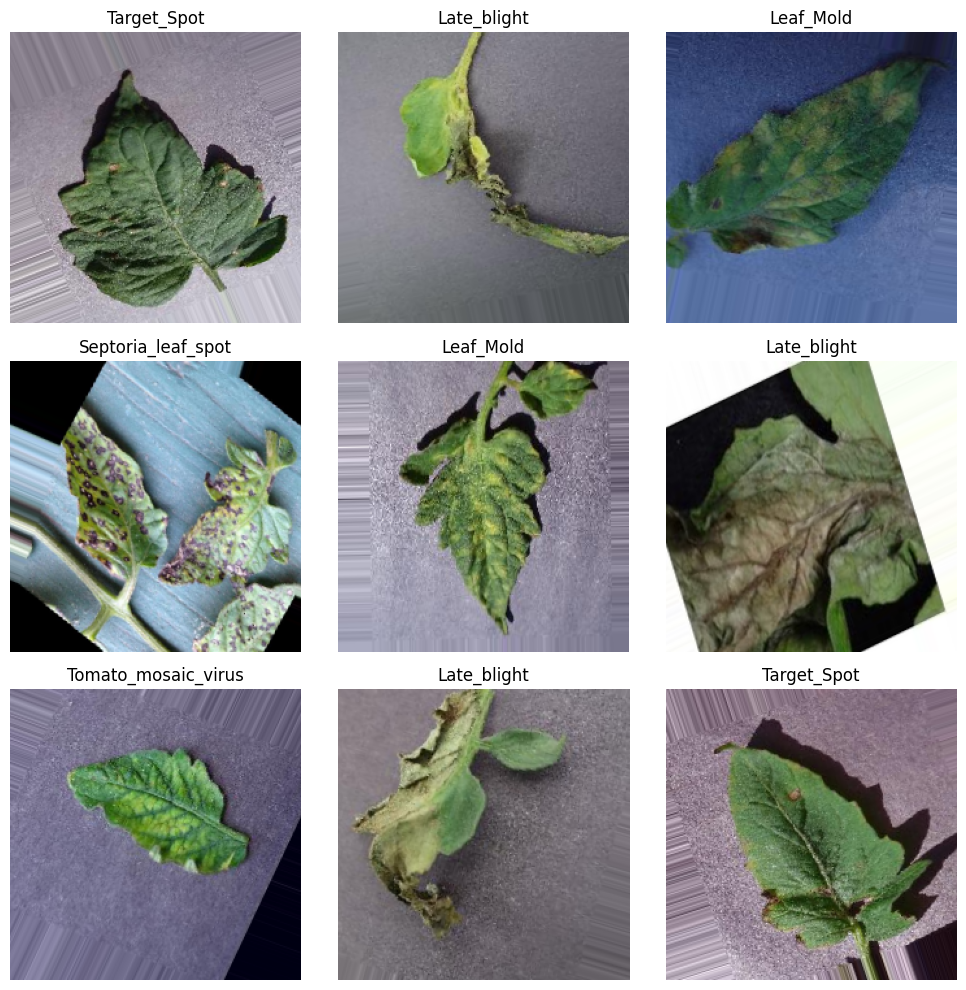

In [ ]:
images, labels = next(train_generator)

# Tentukan jumlah gambar yang ingin ditampilkan
num_images = 9
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])

    # Mendapatkan nama kelas dari indeks
    class_name = list(train_generator.class_indices.keys())[label_index]
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()